In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

48.13505591939264 89.2747165047565
37.28983660292084 -60.31154333337696
-24.0588961970316 -151.71275639479518
-78.08313727956872 -179.42075489258303
71.12825729944237 32.932986133918746
3.8454208560916925 -146.3751949612747
79.54151808670903 43.030301507101484
-31.27447924165415 125.22892117091646
74.80196274160411 152.64652150838396
-49.79754834606021 -4.956492504940769
-75.339616206055 95.31776089180761
31.505365579486707 -104.7489105159385
23.12881971667663 -109.44282015688312
50.48404284708619 38.57318583879021
-19.70882523907882 -168.02154537574523
65.94536409746786 -128.37678870432697
37.60046006321625 107.55421861059534
-33.95191353603604 -153.9738229429164
26.673465879496675 -52.54983502073941
39.47344243101821 -65.62588790640403
-30.683961815125855 164.2408529400348
32.60557899954502 104.1870272755491
0.1554235825694832 -149.6478601014959
51.75663345585167 -41.22352862699762
-28.001080643289093 -58.281718371854396
-66.89463791937537 -119.7075533533571
4.424320563760787 99.6728

63.86264877514597 109.98179486377205
82.29493427241243 -25.78559975311316
66.10606036277855 -117.89687866113898
21.63794772354494 156.2100013843737
2.200014897093908 173.49013919807976
33.356198895547294 -137.60762115377278
-27.442444709608523 -96.08092438718789
19.55326790287569 -58.36386398496239
54.22851913733737 173.64802067863866
-50.29454734444466 -13.941518011708126
-3.136751068468442 -84.51401194607072
-60.6012672723934 7.5158029336456025
-9.222444584381407 -77.20869081067511
-82.47344804823089 -104.6009216438233
40.232724341312434 -142.11539633984722
19.909445517338767 142.42281731454256
47.483779009844284 -109.20332603231705
-79.8788598024625 -6.2327146289299264
-62.85508152721924 118.05379256678026
-9.09807740413801 -79.71185823284165
37.14496170296961 -128.49179086176656
-44.2829553126018 146.86928044993726
69.0818288207372 42.50981548692175
76.42884444407397 -102.64188264277819
47.54847418677517 -179.70632836274635
1.2376218688457072 -93.04004999314064
-72.53217417214336 2

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a21dcaed83d40a3f9a33a4a5d444722b'

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
 
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | altay
Processing Record 2 of Set 1 | saint george
Processing Record 3 of Set 1 | avera
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | skalistyy
City not found. Skipping...
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | ostrovnoy
Processing Record 8 of Set 1 | esperance
Processing Record 9 of Set 1 | chokurdakh
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | carlsbad
Processing Record 13 of Set 1 | cabo san lucas
Processing Record 14 of Set 1 | alekseyevka
Processing Record 15 of Set 1 | alofi
Processing Record 16 of Set 1 | norman wells
Processing Record 17 of Set 1 | yinchuan
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | codrington
Processing Record 20 of Set 1 | shelburne
Processing Record 21 of Set 1 | vao
Processing Record 22 of Set 1 | jiangyou
Processing Reco

Processing Record 34 of Set 4 | byron bay
Processing Record 35 of Set 4 | meulaboh
Processing Record 36 of Set 4 | sur
Processing Record 37 of Set 4 | langham
Processing Record 38 of Set 4 | san cristobal
Processing Record 39 of Set 4 | lemesos
City not found. Skipping...
Processing Record 40 of Set 4 | atbasar
Processing Record 41 of Set 4 | bhainsdehi
Processing Record 42 of Set 4 | borogontsy
Processing Record 43 of Set 4 | troyes
Processing Record 44 of Set 4 | kismayo
Processing Record 45 of Set 4 | mangrol
Processing Record 46 of Set 4 | sorland
Processing Record 47 of Set 4 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 48 of Set 4 | kavieng
Processing Record 49 of Set 4 | burnie
Processing Record 50 of Set 4 | praya
Processing Record 1 of Set 5 | sabancuy
Processing Record 2 of Set 5 | mozarlandia
Processing Record 3 of Set 5 | ilhabela
Processing Record 4 of Set 5 | ahipara
Processing Record 5 of Set 5 | nikolskoye
Processing Record 6 of Set 5 | kalmunai
Pr

Processing Record 23 of Set 8 | kirkwall
Processing Record 24 of Set 8 | chara
Processing Record 25 of Set 8 | gatton
Processing Record 26 of Set 8 | muisne
Processing Record 27 of Set 8 | labuhan
Processing Record 28 of Set 8 | riverton
Processing Record 29 of Set 8 | maralal
Processing Record 30 of Set 8 | mount isa
Processing Record 31 of Set 8 | ust-kuyga
Processing Record 32 of Set 8 | ardabil
Processing Record 33 of Set 8 | izhma
Processing Record 34 of Set 8 | clyde river
Processing Record 35 of Set 8 | pacific grove
Processing Record 36 of Set 8 | christchurch
Processing Record 37 of Set 8 | saint-augustin
Processing Record 38 of Set 8 | port hedland
Processing Record 39 of Set 8 | nishihara
Processing Record 40 of Set 8 | severo-yeniseyskiy
Processing Record 41 of Set 8 | poum
Processing Record 42 of Set 8 | vila velha
Processing Record 43 of Set 8 | maceio
Processing Record 44 of Set 8 | north platte
Processing Record 45 of Set 8 | bowen
Processing Record 46 of Set 8 | puke
P

Processing Record 14 of Set 12 | namatanai
Processing Record 15 of Set 12 | vestmanna
Processing Record 16 of Set 12 | padang
Processing Record 17 of Set 12 | fengzhen
Processing Record 18 of Set 12 | guerrero negro
Processing Record 19 of Set 12 | adre
Processing Record 20 of Set 12 | san carlos de bariloche
Processing Record 21 of Set 12 | tabora
Processing Record 22 of Set 12 | baruun-urt
Processing Record 23 of Set 12 | nome
Processing Record 24 of Set 12 | gelemso
Processing Record 25 of Set 12 | katherine
Processing Record 26 of Set 12 | venado tuerto
Processing Record 27 of Set 12 | matay
Processing Record 28 of Set 12 | zhuhai
Processing Record 29 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 30 of Set 12 | balod
Processing Record 31 of Set 12 | nesna
Processing Record 32 of Set 12 | kampong thum
Processing Record 33 of Set 12 | ritchie
Processing Record 34 of Set 12 | king city
Processing Record 35 of Set 12 | san luis
Processing Record 36 of Set 12 |

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Altay,47.8667,88.1167,66.56,38,12,6.64,CN,2022-07-27 17:02:16
1,Saint George,37.1041,-113.5841,87.64,55,0,3.00,US,2022-07-27 17:02:16
2,Avera,33.1940,-82.5271,91.54,39,81,8.25,US,2022-07-27 17:02:17
3,Vaini,-21.2000,-175.2000,74.77,67,34,14.50,TO,2022-07-27 17:02:18
4,Atuona,-9.8000,-139.0333,77.25,67,50,21.45,PF,2022-07-27 16:58:40
5,Ostrovnoy,68.0531,39.5131,66.06,75,100,19.60,RU,2022-07-27 17:02:19
6,Esperance,-33.8667,121.9000,51.64,89,84,11.45,AU,2022-07-27 17:02:19
7,Chokurdakh,70.6333,147.9167,44.22,64,87,10.78,RU,2022-07-27 17:02:20
8,Cape Town,-33.9258,18.4232,62.35,75,0,8.01,ZA,2022-07-27 17:02:20
9,Albany,42.6001,-73.9662,81.05,50,99,1.01,US,2022-07-27 17:01:16


In [30]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date", "Lat",
                    "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"] 

# Assign a new or the same DataFrame the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Altay,CN,2022-07-27 17:02:16,47.8667,88.1167,66.56,38,12,6.64
1,Saint George,US,2022-07-27 17:02:16,37.1041,-113.5841,87.64,55,0,3.00
2,Avera,US,2022-07-27 17:02:17,33.1940,-82.5271,91.54,39,81,8.25
3,Vaini,TO,2022-07-27 17:02:18,-21.2000,-175.2000,74.77,67,34,14.50
4,Atuona,PF,2022-07-27 16:58:40,-9.8000,-139.0333,77.25,67,50,21.45
5,Ostrovnoy,RU,2022-07-27 17:02:19,68.0531,39.5131,66.06,75,100,19.60
6,Esperance,AU,2022-07-27 17:02:19,-33.8667,121.9000,51.64,89,84,11.45
7,Chokurdakh,RU,2022-07-27 17:02:20,70.6333,147.9167,44.22,64,87,10.78
8,Cape Town,ZA,2022-07-27 17:02:20,-33.9258,18.4232,62.35,75,0,8.01
9,Albany,US,2022-07-27 17:01:16,42.6001,-73.9662,81.05,50,99,1.01


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [33]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1658949991.362982

In [34]:
today = time.strftime("%x")
today

'07/27/22'

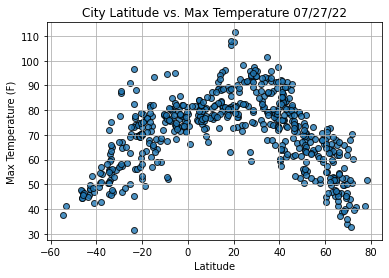

In [35]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

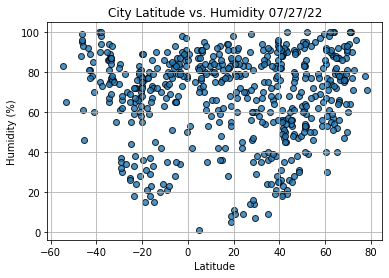

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

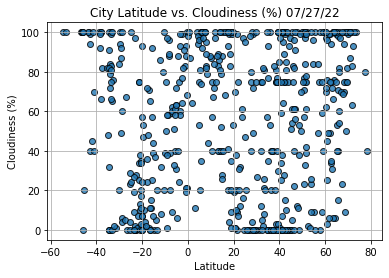

In [37]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

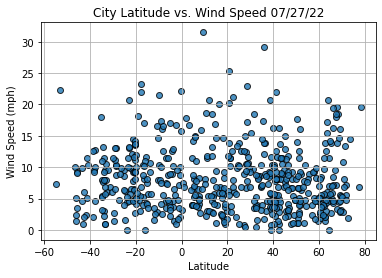

In [38]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [41]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [42]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Altay,CN,2022-07-27 17:02:16,47.8667,88.1167,66.56,38,12,6.64
1,Saint George,US,2022-07-27 17:02:16,37.1041,-113.5841,87.64,55,0,3.00
2,Avera,US,2022-07-27 17:02:17,33.1940,-82.5271,91.54,39,81,8.25
5,Ostrovnoy,RU,2022-07-27 17:02:19,68.0531,39.5131,66.06,75,100,19.60
7,Chokurdakh,RU,2022-07-27 17:02:20,70.6333,147.9167,44.22,64,87,10.78
...,...,...,...,...,...,...,...,...,...
545,Aksu,CN,2022-07-27 17:21:21,41.1231,80.2644,91.90,18,38,22.03
546,Quchan,IR,2022-07-27 17:21:21,37.1060,58.5095,80.47,39,0,8.57
548,Ak-Dovurak,RU,2022-07-27 17:21:22,51.1833,90.6000,56.17,53,33,2.51
549,Lensk,RU,2022-07-27 17:21:22,60.7253,114.9278,71.19,74,3,3.67


In [43]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Altay,CN,2022-07-27 17:02:16,47.8667,88.1167,66.56,38,12,6.64
1,Saint George,US,2022-07-27 17:02:16,37.1041,-113.5841,87.64,55,0,3.00
2,Avera,US,2022-07-27 17:02:17,33.1940,-82.5271,91.54,39,81,8.25
5,Ostrovnoy,RU,2022-07-27 17:02:19,68.0531,39.5131,66.06,75,100,19.60
7,Chokurdakh,RU,2022-07-27 17:02:20,70.6333,147.9167,44.22,64,87,10.78


In [44]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

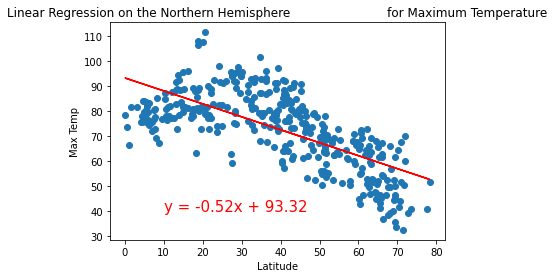

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

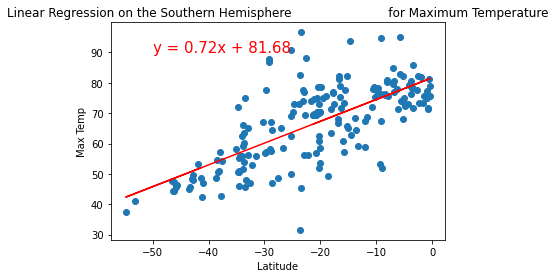

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

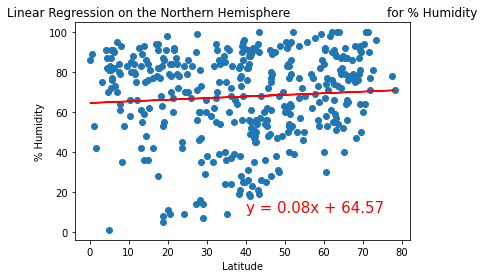

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

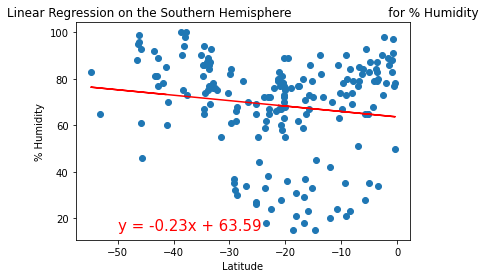

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

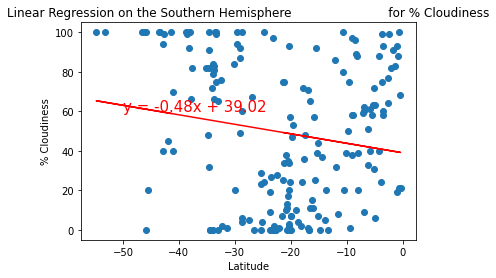

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

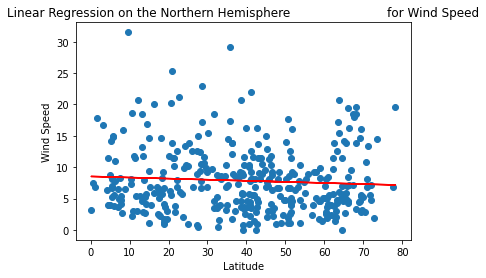

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

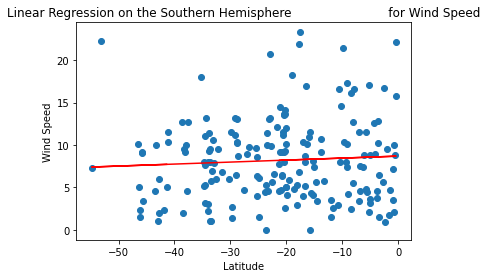

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))